In [3]:
import warnings

import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive #구글드라이브 이용시 실행
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [5]:
warnings.simplefilter(action='ignore', category=FutureWarning)
    # R과 비슷한 코드 작성을 위해 FutureWarning 무시
plt.style.use('seaborn')
    # 'ggplot'등 취향에 따라 그래프(matplotlib) style 선택 가능
    # https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html 참고

# 단순 선형 회귀분석 (광고매출액)

광고비 매출액 데이터를 활용한 단순 선형 회귀분석 실습

- X : 광고비

- y : 매출액

In [4]:
# 데이터를 직접 입력
ad_data = pd.DataFrame({'x': [5,  6,  7,  8,  9, 11, 12, 13, 14, 15],
                        'y': [16, 19, 18, 20, 24, 26, 30, 32, 31, 34]})

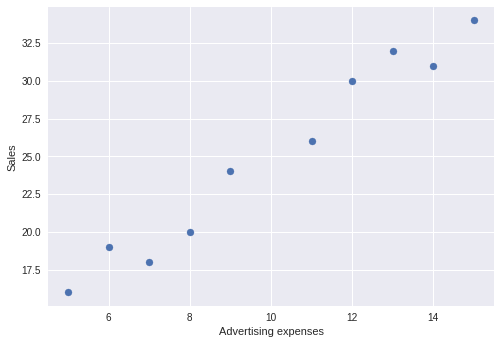

In [5]:
plt.scatter('x', 'y', data=ad_data)
plt.xlabel('Advertising expenses')
plt.ylabel('Sales')
plt.show() #데이터 산점도 출력

## 공분산 및 상관계수

In [6]:
def make_covariance_df(x1, x2):
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)
    x1_x = x1-mean_x1
    x2_x = x2-mean_x2
    #표본공분산의 계산
    cov_raw = pd.DataFrame({'x': x1, 'y': x2,'x1-mean_x': x1_x,'y-mean_y': x2_x,
                           'S_xx': x1_x*x1_x,'S_yy': x2_x*x2_x,'S_xy': x1_x*x2_x})
    cov_sum = cov_raw.apply(np.sum)
    return cov_raw, cov_sum 

In [7]:
cov_df, sum_df = make_covariance_df(ad_data.x, ad_data.y)
cov_df

,x,y,x1-mean_x,y-mean_y,S_xx,S_yy,S_xy
0,5,16,-5.0,-9.0,25.0,81.0,45.0
1,6,19,-4.0,-6.0,16.0,36.0,24.0
2,7,18,-3.0,-7.0,9.0,49.0,21.0
3,8,20,-2.0,-5.0,4.0,25.0,10.0
4,9,24,-1.0,-1.0,1.0,1.0,1.0
5,11,26,1.0,1.0,1.0,1.0,1.0
6,12,30,2.0,5.0,4.0,25.0,10.0
7,13,32,3.0,7.0,9.0,49.0,21.0
8,14,31,4.0,6.0,16.0,36.0,24.0
9,15,34,5.0,9.0,25.0,81.0,45.0


In [ ]:
sum_df.round(3)

x            100.0
y            250.0
x1-mean_x      0.0
y-mean_y       0.0
S_xx         110.0
S_yy         384.0
S_xy         202.0
dtype: float64

In [8]:
#표본상관계수의 계산 (직접 코딩)
corr = sum_df.S_xy / np.sqrt(sum_df.S_xx * sum_df.S_yy)

print('covariance : {:0.2f}'.format(sum_df.S_xy))
print('correlation : {:0.4f}'.format(corr))

covariance : 202.00
correlation : 0.9829


In [ ]:
# 패키지 'scipy' 를 이용해 표본상관계수를 계산하고 상관분석 실행
corr, p_value = stats.pearsonr(ad_data.x, ad_data.y)

print('correlation : {:0.4f}'.format(corr))
print('p value : {:0.4f}'.format(p_value))

correlation : 0.9829
p value : 0.0000


## 회귀분석

In [9]:
# 광고비 매출액 자료에 대해 단순선형회귀모형 적합
ad_model = ols('y ~ x', data=ad_data).fit()
  # 'y ~ x' 는 y가 반응변수이고 x가 설명변수임을 의미
print(ad_model.summary()) # 결과 출력

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     227.3
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           3.70e-07
Time:                        04:29:30   Log-Likelihood:                -15.522
No. Observations:                  10   AIC:                             35.04
Df Residuals:                       8   BIC:                             35.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6364      1.283      5.172      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


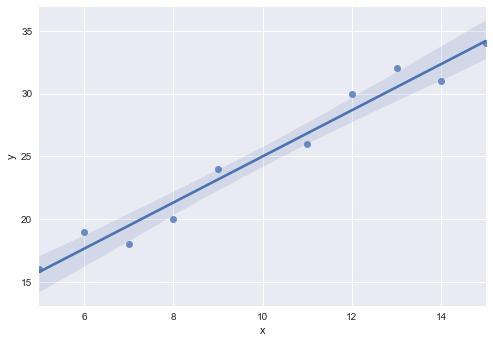

In [ ]:
# 데이터의 산점도에 적합된 회귀직선과 95% 신뢰구간 표시
sns.regplot('x', 'y', data=ad_data, ci=95)
plt.show()

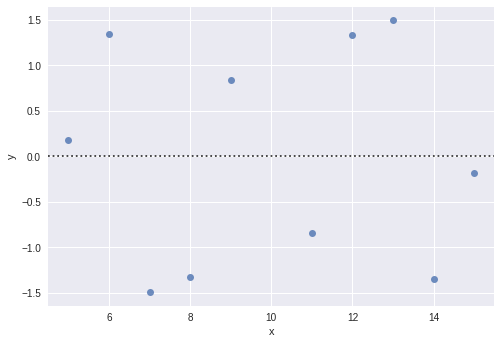

In [11]:
# 산점도 그림
sns.residplot('x', 'y', data=ad_data)
plt.show()

# 단순 선형 회귀분석 (동물들의 뇌무게)

- X : BodyWt (몸무게)

- y : BrainWt (뇌 무게)

In [16]:
### 데이터 불러오기 ###
# 내 컴퓨터에 저장된 데이터의 경우 다음 실행 (경로유의)
#brian_data = pd.read_excel('./data/brains.xls', index_col='Label') 

# 구글드라이브에 저장된 데이터의 경우 다음 실행 (경로유의)                            
brian_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/brains.xls', index_col='Label')

brian_data.head()

,BodyWt,BrainWt
Label,,
Arctic fox,3.385,44.500
Owl monkey,0.480,15.499
Beaver,1.350,8.100
Cow,464.983,423.012
Gray wolf,36.328,119.498


In [17]:
#뇌무게 데이터에 단순선형회귀모형을 적합
brain_model = ols('BrainWt ~ BodyWt', data=brian_data).fit()

print(brain_model.summary()) #결과 출력

                            OLS Regression Results                            
Dep. Variable:                BrainWt   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.1
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           1.55e-28
Time:                        04:36:31   Log-Likelihood:                -447.39
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.0086     43.556      2.089      0.0

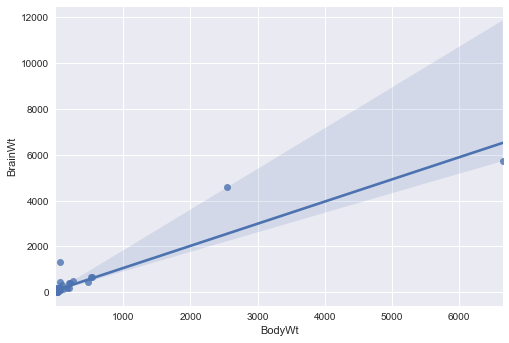

In [ ]:
# 데이터의 산점도와 적합된 회귀직선과 95% 신뢰구간 표시
sns.regplot('BodyWt', 'BrainWt', data=brian_data, ci=95)
plt.show()

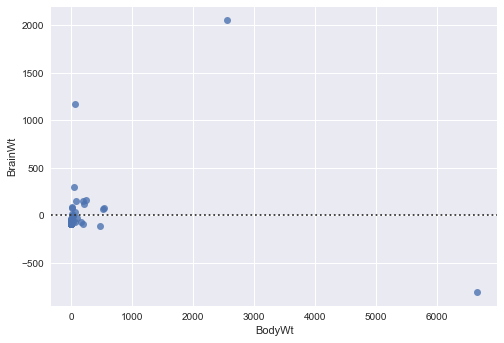

In [ ]:
#잔차 그림
sns.residplot('BodyWt', 'BrainWt', data=brian_data)
plt.show()

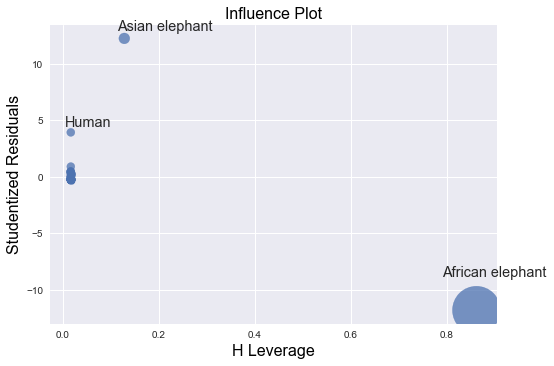

In [ ]:
#영향도 그림
sm.graphics.influence_plot(brain_model)
plt.show()

## 변수 변환 : 각 변수에 log 변환 적용

- $X'=\ln X$
- $Y'=\ln Y$

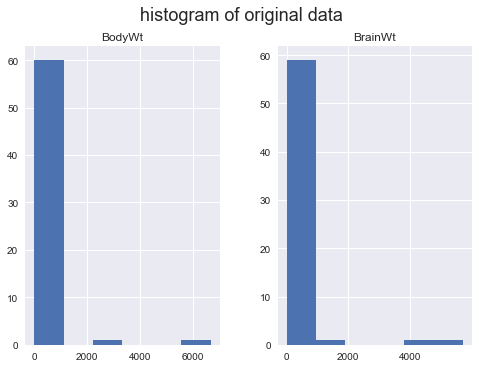

In [ ]:
#원 변수의 히스토그램 출력
brian_data.hist(bins=6) #bin: 변수값들을 몇 개의 구간으로 나눌지 결정
plt.suptitle('histogram of original data',fontsize=18)
plt.show()

In [ ]:
#로그 변환 적용
log_brian_data = np.log(brian_data)

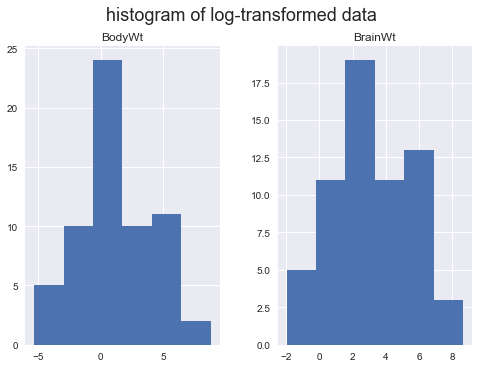

In [ ]:
#로그변환 후 변수의 히스토그램 출력
log_brian_data.hist(bins=6)
plt.suptitle('histogram of log-transformed data',fontsize=18)
plt.show()

In [ ]:
#로그변환 후 변수에 대해 선형회귀모형 적합
log_brain_model = ols('BrainWt ~ BodyWt', data=log_brian_data).fit()
print(log_brain_model.summary()) #결과 출력

                            OLS Regression Results                            
Dep. Variable:                BrainWt   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           9.83e-35
Time:                        00:06:17   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.0

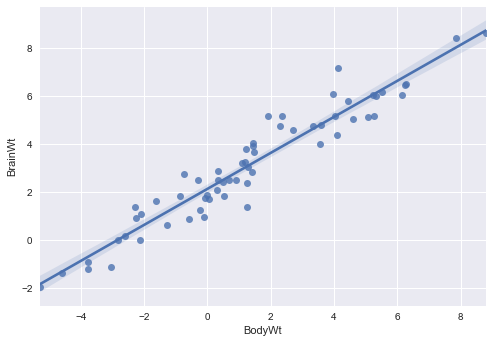

In [ ]:
# 로그변환 후 데이터의 산점도와 적합된 회귀직선과 95% 신뢰구간 표시
sns.regplot('BodyWt', 'BrainWt', data=log_brian_data, ci=95)
plt.show()

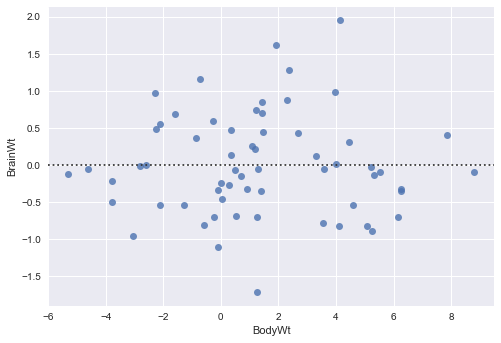

In [ ]:
#로그 변환된 자료에 적합한 후 잔차
sns.residplot('BodyWt', 'BrainWt', data=log_brian_data)
plt.show()

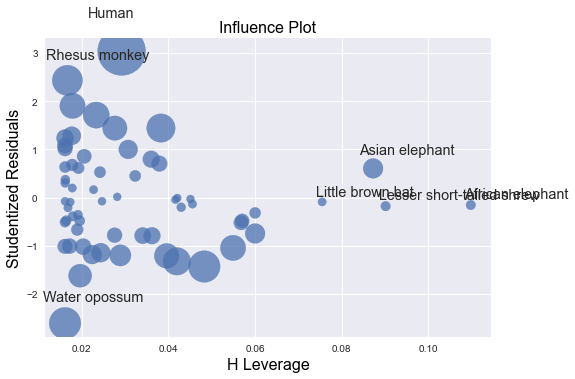

In [ ]:
#로그 변환된 자료에 적합한 후 영향도
sm.graphics.influence_plot(log_brain_model)
plt.show()

# 다중 선형 회귀분석

- $X_1$ : 중간고사 성적

- $X_2$ : 성별

- $y$ : 기말고사 성적

In [17]:
### 데이터 불러오기 ###
# 내 컴퓨터에 저장된 데이터의 경우 다음 실행 (경로유의)
df = pd.read_csv('C:\DataScience\yeonsei\Week1_Linear Regression\data\grade.csv')


# 구글드라이브에 저장된 데이터의 경우 다음 실행 (경로유의)     
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/grade.csv')

In [18]:
df.head() #데이터의 첫 5행 확인

,y,x1,x2
0,81,92,female
1,63,61,female
2,91,97,female
3,60,40,female
4,95,85,female


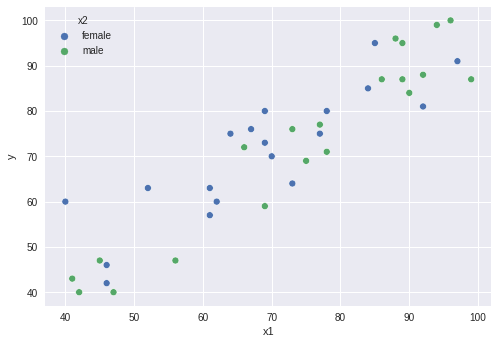

In [19]:
#데이터의 산점도 (성별 x2 에 따라 다른 색깔로 표현)
sns.scatterplot('x1','y',hue='x2', data=df)
plt.show()

## 기울기가 동일하고 절편이 다른 모형

\begin{eqnarray*}
Y=\beta_0+\beta_1X_{1}+\beta_2X_{2}+\epsilon
\qquad\text{where}\quad
X_{1} &=& \text{중간고사 성적}\\
 X_{2} &=& \left\{ \begin{array}{cl} 1 & \mbox{: 남자} \\
                                  0 & \mbox{: 여자}
                 \end{array}\right.
\end{eqnarray*}

In [20]:
grade_model = ols('y ~ x1 + C(x2)', data=df).fit()
                  # statsmodels에서 C( )를 사용해 범주형 변수임을 지정
                  # 출력에서 [T.male]은 male 이 True 일때 라는 의미
                  # abc순(정확히는 ASCII)에 의해 female이 0, male이 1
                  # 범주형 변수가 1,2,3 등으로 되어 있는 경우엔 반드시 C( ) 를 적용
                  # https://www.statsmodels.org/devel/example_formulas.html
print(grade_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     109.7
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           2.81e-16
Time:                        04:44:20   Log-Likelihood:                -132.77
No. Observations:                  40   AIC:                             271.5
Df Residuals:                      37   BIC:                             276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.5318      4.674      1.397

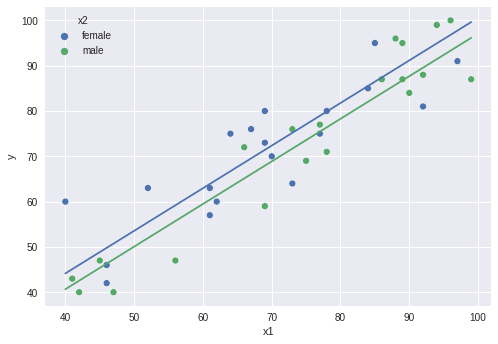

In [21]:
# 데이터의 산점도
sns.scatterplot('x1','y',hue='x2', data=df)

# 성별로 적합된 직선 두 개를 그림
xx = np.linspace(min(df.x1),max(df.x1),100)
yy1 = grade_model.predict({'x1':xx, 'x2':['female']*len(xx)})
plt.plot(xx, yy1)

yy2 = grade_model.predict({'x1':xx, 'x2':['male']*len(xx)})
plt.plot(xx, yy2)

plt.show()

## 기울기와 절편이 모두 다른 모형


\begin{eqnarray*}
Y=\beta_0+\beta_1X_{1}+\beta_2X_{2}+\beta_3X_{1}X_{2}+\epsilon
\qquad\text{where}\quad
X_{1} &=& \text{중간고사 성적}\\
 X_{2} &=& \left\{ \begin{array}{cl} 1 & \mbox{: 남자} \\
                                  0 & \mbox{: 여자}
                 \end{array}\right.
\end{eqnarray*}

In [ ]:
#곱항을 추가한 모형
grade_model2 = ols('y ~ x1*C(x2)', data=df).fit()
    #'y ~ x1*C(x2)'에서 곱항을 지정하면 하위단계의 x1 과 C(x2)는 자동으로 포함됨
print(grade_model2.summary()) #결과 출력

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     77.17
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           9.56e-16
Time:                        10:24:10   Log-Likelihood:                -131.37
No. Observations:                  40   AIC:                             270.7
Df Residuals:                      36   BIC:                             277.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.8097      6.865  

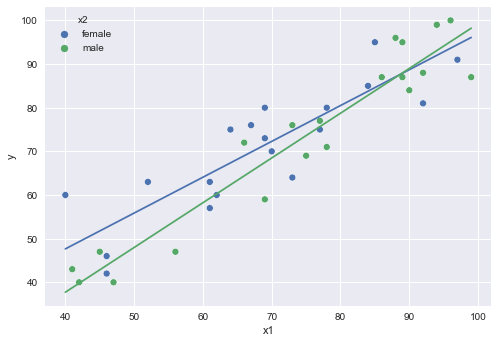

In [ ]:
# 데이터의 산점도
sns.scatterplot('x1','y',hue='x2', data=df)

# 성별로 적합된 직선 두 개를 그림
xx = np.linspace(min(df.x1),max(df.x1),100)
yy1 = grade_model2.predict({'x1':xx, 'x2':['female']*len(xx)})
plt.plot(xx, yy1)

yy2 = grade_model2.predict({'x1':xx, 'x2':['male']*len(xx)})
plt.plot(xx, yy2)

plt.show()

## 크레딧카드 데이터 

In [21]:
data = pd.read_csv('../data/credit.csv', index_col='ID').drop('Unnamed: 0', axis=1)
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/credit.csv', index_col='ID').drop('Unnamed: 0', axis=1)

data.head() #데이터 첫 5행 확인. 마지막 열인 Balance 가 반응변수이고 나머지 총 10개의 설명변수 존재 

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
ID,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [24]:
# 편의를 위해 범주형 변수 4개를 제거
data = data.drop(['Gender', 'Student', 
               'Married', 'Ethnicity'], axis=1) 

KeyError: "['Gender' 'Student' 'Married' 'Ethnicity'] not found in axis"

In [28]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
ID,,,,,,,
1,14.891,3606,283,2,34,11,333
2,106.025,6645,483,3,82,15,903
3,104.593,7075,514,4,71,11,580
4,148.924,9504,681,3,36,11,964
5,55.882,4897,357,2,68,16,331


<Figure size 1440x1440 with 0 Axes>

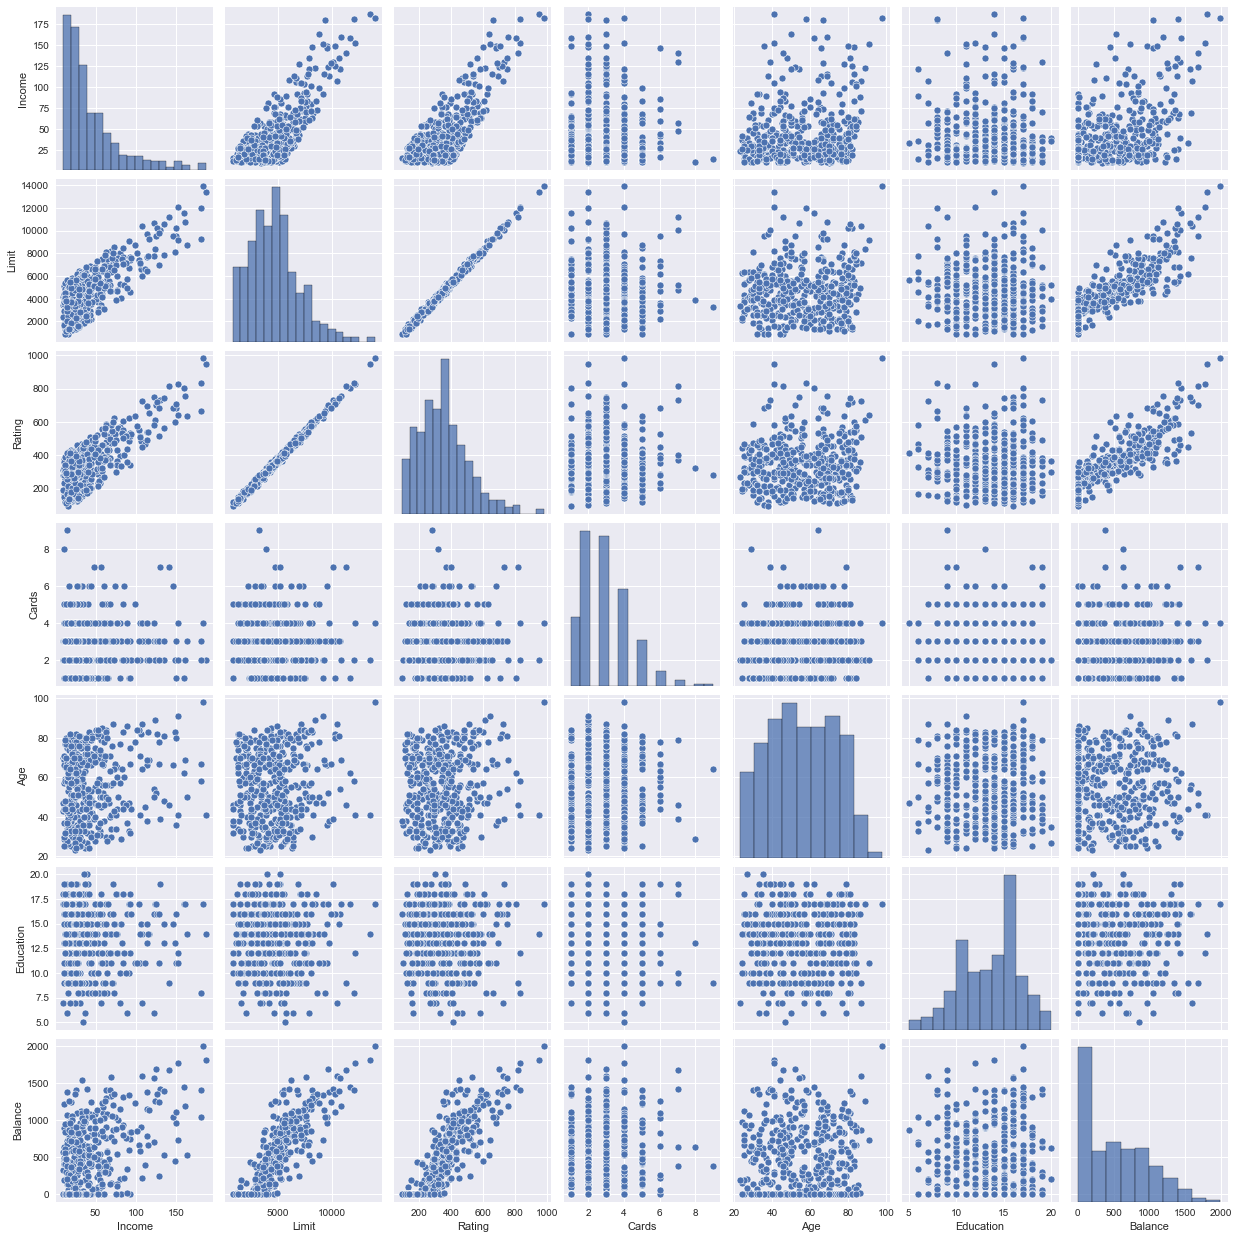

In [29]:
# 이제 데이터에는 총 7개의 변수만 남음 (반응변수 1개 포함)
plt.figure(figsize=(20,20))
sns.pairplot(data) #행렬산점도 그림
plt.show()

#6개의 설명변수 모두 사용한 다중회귀분석 결과

In [32]:
# 회귀모형에서 사용할 설명변수들을 X 로 저장 (범주형변수과 반응변수 제외) 
X = data.drop(['Balance'], axis=1)

# 회귀모형에서 사용할 반응변수를 y 로 저장
y = data.Balance

In [33]:
y.head()

ID
1    333
2    903
3    580
4    964
5    331
Name: Balance, dtype: int64

In [34]:
# X에 포함된 모든 변수를 다 사용한 선형회귀모형의 공식 세팅
formula = 'Balance ~ Income + Limit + Rating + Cards + Age + Education'
results = ols(formula, data).fit() #모형 적합
print(results.summary()) #결과 출력

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     472.5
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          3.01e-176
Time:                        00:15:53   Log-Likelihood:                -2598.2
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     393   BIC:                             5238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -477.9581     55.065     -8.680      0.0

# 전진선택법과 후진선택법

참고 https://planspace.org/20150423-forward_selection_with_statsmodels/

In [35]:
# 전진선택법 알고리즘 정의 (AIC 이용) 파이썬에는 패키지가 없어 직접 코딩하였음.
def forward_selected_aic(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by aic
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = np.inf, np.inf
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().aic # (also can change bic)
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        print(pd.DataFrame(scores_with_candidates).T)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('---->',best_new_score, best_candidate, '\n')
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [36]:
# 후진제거법 알고리즘 정의 (AIC 이용) 파이썬에는 패키지가 없어 직접 코딩하였음.
def backward_selected_aic(data, response):
    """Linear model designed by backward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by aic
    """
    selected = set(data.columns)
    selected.remove(response)
    current_score, best_new_score = np.inf, np.inf
    while selected and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in selected:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected - set([candidate])))
            score = ols(formula, data).fit().aic # (also can change bic)
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        print(pd.DataFrame(scores_with_candidates).T)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('---->',best_new_score, best_candidate, '\n')
        if current_score > best_new_score:
            selected.remove(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [37]:
# 전진선택법 실행 (위에서 정의한 함수 이용)
model = forward_selected_aic(data, 'Balance')

print(model.model.formula) #선택된 설명변수들 출력
print(model.summary()) #모형의 결과 출력

         0          1        2        3        4        5
0  6042.71    6042.69  6039.71  5945.89  5499.98  5494.78
1      Age  Education    Cards   Income    Limit   Rating
----> 5494.781548180919 Rating 

         0          1        2        3        4
0  5496.63    5496.27  5494.19  5484.48  5212.56
1    Limit  Education    Cards      Age   Income
----> 5212.557084956779 Income 

         0          1        2        3
0  5214.48    5213.77  5211.11  5210.95
1    Cards  Education      Age    Limit
----> 5210.950291148072 Limit 

           0        1        2
0    5212.41  5210.51  5209.72
1  Education    Cards      Age
----> 5209.7205261188565 Age 

           0        1
0    5211.14  5209.01
1  Education    Cards
----> 5209.013438304617 Cards 

           0
0    5210.41
1  Education
----> 5210.412569206092 Education 

Balance ~ Rating + Income + Limit + Age + Cards + 1
                            OLS Regression Results                            
Dep. Variable:                Bal

# Lasso 회귀모형

In [63]:
X.head() #설명변수들 확인

,Income,Limit,Rating,Cards,Age,Education
ID,,,,,,
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15
3,104.593,7075,514,4,71,11
4,148.924,9504,681,3,36,11
5,55.882,4897,357,2,68,16


#슬라이드의 Lasso 모형의 계수들이 0에 수렴하는 그림 재현 (중요하지 않음)

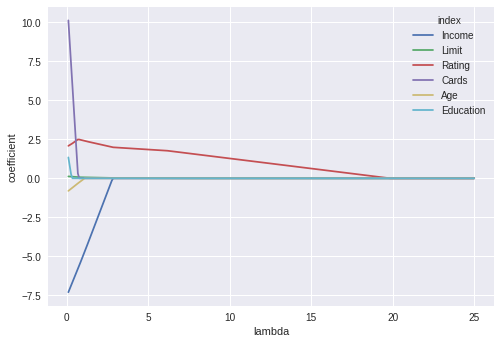

In [64]:
alphas = np.linspace(0.1, 25, 300) # 사용할 alpha (=Lambda) 의 후보 값들
df = pd.DataFrame() # 결과를 저장하기 위해 빈 pandas.DataFrame 생성
 
column =  X.columns # plot에서 index를 위해
 
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
#X = scaler.fit_transform(X) 
 
# lasso cv
for cnt in alphas: # 위에서 정한 alphas 하나하나 cnt로 할당하여 반복
    temp_model = LassoCV(cv=5, random_state=0, alphas=[cnt], max_iter=1e5, normalize=True).fit(X,y)
                     # cv : 반복수, random_state : 샘플링할때 seed
                     # max_iter : 수치값들이 수렴할 수 있게 허용하는 최대 반복수 (크게 설정)
    temp_coef = pd.Series(temp_model.coef_,index=column)
                     # 각 alpha에 대해 lasso한 결과에서 회귀계수를 pandas.Series 형태로 저장
    df[temp_model.alpha_] = temp_coef
                     # 위에서 임시로 저장한 것을 전체로 저장
 
df = df.reset_index().melt(id_vars='index')
      # 데이터 프레임을 plot을 그리기 위해 index 칼럼을 기준으로 unpivot
      # reset_index()는 데이터 프레임에서 index를 칼럼으로 바꾸려고 melt 전에 사용
 
        
# 그래프
sns.lineplot(x="variable", y="value", hue="index",
             data=df)
plt.xlabel('lambda')
plt.ylabel('coefficient')
#plt.savefig('../fig/figure_0203_lasso.png')
plt.show()

In [65]:
# 최적의 람다값을 CV오차를 이용해 자동으로 찾아주는 LassoCV 함수 이용
# 설명변수들 X 와 반응변수 y 는 위에서 정의했으므로 바로 사용함
model = LassoCV(cv=5, alphas=None, random_state=0, 
                max_iter=1e5, normalize=True).fit(X,y)

  # cv=5: K-겹교차검증에서 K 값
  # alphas = None:  후보 alphas (=lambda) 값의 집합을 자동으로 생성
  # random_state : 샘플링할때 seed
  # max_iter : 수치값들이 수렴할 수 있게 허용하는 최대 반복수 (크게 설정)
  # normalize=True : 자료를 표준화함.

In [66]:
# LassoCV 의 결과 출력
column =  X.columns
print('best lambda: %.2f\n' % model.alpha_)
print('회귀계수:\n',
      [name + ' : %.2f' % coef for name, coef in zip(column, model.coef_)])
print('\n회귀절편: %.2f\n' % model.intercept_)

best lambda: 0.02

회귀계수:
 ['Income : -7.50', 'Limit : 0.13', 'Rating : 2.03', 'Cards : 11.45', 'Age : -0.87', 'Education : 1.85']

회귀절편: -473.76



# 끝. 수고하셨습니다